In [4]:
import pykitti
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [5]:
# Change this to the directory where you store KITTI data
basedir = '../data/'

# Specify the dataset to load
date = '2011_09_26'
drive = '0048'

In [6]:
# Optionally, specify the frame range to load
frame_range = range(0, 20, 5)

In [7]:
# Load the data
# dataset = pykitti.raw(basedir, date, drive)
dataset = pykitti.raw(basedir, date, drive, frame_range)

In [9]:
# Load some data
dataset.load_calib()        # Calibration data are accessible as named tuples
dataset.load_timestamps()   # Timestamps are parsed into datetime objects
dataset.load_oxts()         # OXTS packets are loaded as named tuples
dataset.load_gray()         # Left/right images are accessible as named tuples
dataset.load_rgb()          # Left/right images are accessible as named tuples
dataset.load_velo()         # Each scan is a Nx4 array of [x,y,z,reflectance]

Loading OXTS timestamps from 2011_09_26_drive_0048_sync...
Found 4 timestamps...
done.
Loading OXTS data from 2011_09_26_drive_0048_sync...
Found 4 OXTS measurements...
done.
Loading monochrome images from 2011_09_26_drive_0048_sync...
Found 4 image pairs...
done.
Loading color images from 2011_09_26_drive_0048_sync...
Found 4 image pairs...
done.
Found 4 Velodyne scans...
done.


In [10]:
# Display some of the data
np.set_printoptions(precision=4, suppress=True)
print('\nDrive: ' + str(dataset.drive))
print('\nFrame range: ' + str(dataset.frame_range))

print('\nIMU-to-Velodyne transformation:\n' + str(dataset.calib.T_velo_imu))
print('\nGray stereo pair baseline [m]: ' + str(dataset.calib.b_gray))
print('\nRGB stereo pair baseline [m]: ' + str(dataset.calib.b_rgb))

print('\nFirst timestamp: ' + str(dataset.timestamps[0]))
print('\nSecond IMU pose:\n' + str(dataset.oxts[1].T_w_imu))


Drive: 2011_09_26_drive_0048_sync

Frame range: range(0, 20, 5)

IMU-to-Velodyne transformation:
[[ 1.      0.0008 -0.002  -0.8087]
 [-0.0008  0.9999 -0.0148  0.3196]
 [ 0.002   0.0148  0.9999 -0.7997]
 [ 0.      0.      0.      1.    ]]

Gray stereo pair baseline [m]: 0.537150600501

RGB stereo pair baseline [m]: 0.532725440079

First timestamp: 2011-09-26 14:14:10.924614

Second IMU pose:
[[ 0.5892  0.8076 -0.0248  2.2949]
 [-0.808   0.5888 -0.0204 -3.0802]
 [-0.0019  0.0321  0.9995  0.034 ]
 [ 0.      0.      0.      1.    ]]


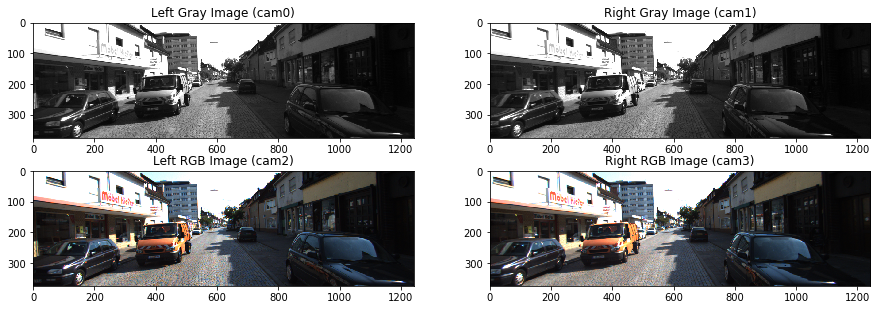

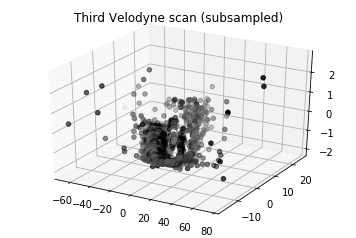

In [11]:
f, ax = plt.subplots(2, 2, figsize=(15, 5))
ax[0, 0].imshow(dataset.gray[0].left, cmap='gray')
ax[0, 0].set_title('Left Gray Image (cam0)')

ax[0, 1].imshow(dataset.gray[0].right, cmap='gray')
ax[0, 1].set_title('Right Gray Image (cam1)')

ax[1, 0].imshow(dataset.rgb[0].left)
ax[1, 0].set_title('Left RGB Image (cam2)')

ax[1, 1].imshow(dataset.rgb[0].right)
ax[1, 1].set_title('Right RGB Image (cam3)')

f2 = plt.figure()
ax2 = f2.add_subplot(111, projection='3d')
# Plot every 100th point so things don't get too bogged down
velo_range = range(0, dataset.velo[2].shape[0], 100)
ax2.scatter(dataset.velo[2][velo_range, 0],
            dataset.velo[2][velo_range, 1],
            dataset.velo[2][velo_range, 2],
            c=dataset.velo[2][velo_range, 3],
            cmap='gray')
ax2.set_title('Third Velodyne scan (subsampled)')

plt.show()